# Data Wrangling Project - Twitter WeRateDogs

## Import Libraries

In [8]:
import requests
import os
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read in given Twitter archive file

In [9]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Programmatic file download

In [10]:
# Specify folder name as current directory
folder_name = os.getcwd()
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [11]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


## Get data from Twitter API

In [12]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [13]:
twitter_list = []
errors = []
ta_tweet_id_list = twitter_archive.tweet_id.tolist()
status_list = range(1, len(ta_tweet_id_list))

# For loop to retrieve tweets in json format. We expect errors.
for index, id in enumerate(ta_tweet_id_list):
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        twitter_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        if index in status_list:
            print('Completed ~', index, ' Length of twitter_list is', 
                  len(twitter_list), ' Length of errors list is', 
                  len(errors))
        else:
            pass
    except Exception as e:
        errors.append((id, e))

In [14]:
# Print errors
print('Number of errors:',len(errors))
for i in range (len(errors)):
    print(errors[i])

In [15]:
# Put the list of dictionaries into twitter_counts with tweet_id first.
twitter_counts = pd.DataFrame.from_dict(twitter_list)
twitter_counts.head()

In [16]:
# Reorder the columns
twitter_counts = twitter_counts[['tweet_id', 'favorites', 'retweets']]       

# Store twitter_counts to csv
twitter_counts.to_csv('twitter_counts.csv', encoding='utf-8', index=False)

## Gather

In [17]:
tweet_api = pd.read_csv('twitter_counts.csv')
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')


## Assess
`tweet_api` table

In [18]:
tweet_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,36938,7872
1,892177421306343426,31785,5844
2,891815181378084864,23954,3859
3,891689557279858688,40264,8034
4,891327558926688256,38463,8703


In [19]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id     2333 non-null int64
favorites    2333 non-null int64
retweets     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [20]:
tweet_api.describe()

,tweet_id,favorites,retweets
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,7704.983712,2773.219031
std,6.820607e+16,11959.284967,4694.251070
min,6.660209e+17,0.000000,1.000000
25%,6.782786e+17,1337.000000,558.000000
50%,7.184547e+17,3353.000000,1299.000000
75%,7.986654e+17,9463.000000,3224.000000
max,8.924206e+17,159620.000000,79673.000000


In [21]:
# check for duplicate tweet id
tweet_api.tweet_id.duplicated().unique()

array([False])

In [22]:
# check for n/a in data
tweet_api.tweet_id.isnull().unique()

array([False])

In [23]:
# check number of digits for tweet_id
digits = []
for i in range(len(tweet_api)):
    digits.append(len(str(tweet_api.tweet_id[i])))
np.unique(digits)

array([18])

## Assess
`twitter_archive` table

In [362]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [363]:
# check number of digits for tweet_id
digits = []
for i in range(len(twitter_archive)):
    digits.append(len(str(twitter_archive.tweet_id[i])))
np.unique(digits)

array([18])

In [364]:
twitter_archive.text.sample(15)

1670    This is Patrick. He's a bigass pupper. 7/10 ht...
2131    "Hi yes this is dog. I can't help with that s-...
1622    "Hello yes I'll just get one of each color tha...
708     This is Doc. He requested to be carried around...
955     This is Toby. A cat got his tongue. 13/10 ador...
974     This is Jameson. He had a few too many in the ...
1094    This is Chadrick. He's gnarly af 13/10 https:/...
1692    This is Chuck. He's a neat dog. Very flexible....
1703    Meet Griswold. He's dapper as hell. Already pu...
1955    This is a Lofted Aphrodisiac Terrier named Kip...
1578    This is Tyrone. He's a leaf wizard. Self-motiv...
1472    This is Kobe. He's a Speckled Rorschach. Reque...
1906    This is Louis. He thinks he's flying. 13/10 th...
418     This is Gabe. He was the unequivocal embodimen...
277     You have been visited by the magical sugar jar...
Name: text, dtype: object

In [365]:
twitter_archive.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [366]:
twitter_archive.timestamp.str[20:26].unique()

array(['+0000'], dtype=object)

+0000 appears in all the timestamps so it can be removed

In [367]:
twitter_archive.in_reply_to_status_id.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [368]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Check text of the tweet.  

In [24]:
# Incrase column width so the entire text field can be displayed
pd.set_option('display.max_colwidth', -1)

In [35]:
twitter_archive['text'].head(2)

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
Name: text, dtype: object

Deciminal in the numerator rating within the tweet text can be cleaned up

In [28]:
# find decimal number in the tweet text eg. 13.5 /10, 9.75/10, etc.
twitter_archive[twitter_archive.text.str.extract(r'(\d+\.\d+)', expand=False).notnull()].text

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
259     This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL                   
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1018    Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ                                                                               

In [369]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [370]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [371]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [372]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [373]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Visual inspection shows that the lowercase names are not actually names. These will be cleaned up later.  

In [374]:
# Find what the lowercase names are, put them in a list 'lower_names' and get count
twitter_archive[twitter_archive['name'].str.islower()]['name']
lower_names = twitter_archive[twitter_archive['name'].str.islower()]['name'].tolist()
print(lower_names)
print()
print('Number of lowercase names:', len(lower_names))

['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']

Number of lowercase names: 109


In [375]:
# Put the list lowercase names to Pandas dataframe and get value counts to see the name occurances.
df = pd.DataFrame(lower_names,columns =['name'])
df.name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
not              2
actually         2
getting          2
mad              2
officially       1
unacceptable     1
my               1
his              1
this             1
infuriating      1
light            1
space            1
incredibly       1
life             1
old              1
by               1
all              1
such             1
Name: name, dtype: int64

In [376]:
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [377]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [378]:
twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [379]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [380]:
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [381]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [382]:
twitter_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [383]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

## Assess
`image_predictions` table

In [384]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
954,705223444686888960,https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg,1,Egyptian_cat,0.090508,False,Chesapeake_Bay_retriever,0.077373,True,Mexican_hairless,0.049472,True
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
1108,723688335806480385,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese_spaniel,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False
461,674800520222154752,https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg,1,Pembroke,0.876479,True,Cardigan,0.096911,True,dingo,0.009196,False
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
1973,869702957897576449,https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True


In [385]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [386]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [387]:
image_predictions.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [388]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [389]:
image_predictions.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [390]:
image_predictions.p1.nunique()

378

In [391]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [392]:
image_predictions.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [393]:
image_predictions.p2.nunique()

405

In [394]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
Samoyed                            20
chow                               20
toy_terrier                        20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [395]:
image_predictions.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [396]:
image_predictions.p3.nunique()

408

In [397]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [398]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [399]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

image_predictions.p3_dog.value_counts()

In [400]:
all_columns = pd.Series(list(tweet_api) + list(twitter_archive) + list(image_predictions))
all_columns[all_columns.duplicated()]

3     tweet_id
20    tweet_id
dtype: object

### Quality
##### `tweet_api` table
- *tweet_id* is int64 and should be a string since it's not being used for numerical calculations but rather to as an id

##### `twitter_archive` table
- *tweet_id* is int64 and should be a string since it's not being used for numerical calculations but rather to as an id
- *rating_numerator* has unrealistically large values
- *rating_denominator* are not all 10
- *timestamp* is a string and not datetime, and remove +0000 from the end
- *retweeted_status_timestamp*, *retweeted_status_id*, *retweeted_status_user_id*, *in_reply_to_status_id*, *in_reply_to_status_id* columns can be removed since they are associated with retweets, and not original tweets
- *name* that are in lowercase is incorrect eg. shows "a" but should be "none" since the name was never mentioned in the tweet text
- "None" under each of the 4 dog stage columns should be replaced with NaN
- *source* column contains unnecessary text.  Clean up data such that it only shows iphone, twitter web, vine, or tweet deck.
- Gender of the dog in the tweet can be extracted from the *text* column by trying to match certain keywords such as he, she, him, her, etc. It wil be either male, female, or NaN (not specified), add a column *gender*.  (not a quality issue but more like additional info that can be extracted from existing data)
- Convert data in the *stage* column from string to categorical type (after converting 4 columns into 1)
- 11 of the rows have 2 stages and need to be manually cleaned.

##### `image_predictions` table
- *p1*,*p2* and *p3* have mix of uppercase and lowercase characters for the dog breed


### Tidiness

##### `twitter archive` table
- dog stage should be in one column instead of four different ones (puppo, pupper, doggo, floofer) so that it satisfies rules of tidy data: Each variable must have its own column. Each observation must have its own row. Each value must have its own cell.



##### Overall
- Merge *tweet_api*, *twitter_archive*, and *image_predictions* into one table.

## Cleaning

Make copy of each of the 3 existing dataframes of gathered data

In [401]:
# Copy dataframes
api_clean = tweet_api.copy()
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()

### Define

#### `tweet_api` table
tweet_id is type int64.  Convert to string.

### Code

In [402]:
api_clean['tweet_id'] = api_clean.tweet_id.astype(str)

### Test

In [403]:
api_clean.tweet_id.dtype

dtype('O')

### Define

#### `tweeter_archive` table
tweet_id is type int64.  Convert to string.

### Code

In [404]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

### Test



In [405]:
archive_clean.tweet_id.dtype

dtype('O')

### Define

#### `tweeter_archive` table
- rating_numerator has unrealistically large values
- rating_denominator are not all 10

### Code

In [406]:
archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [407]:
# Get number of rows with demoninator not equal to 10
archive_clean.query('rating_denominator != 10').shape[0]

23

Let's see what the rating denominator values are for ones not equal to 10.  Show the numerator as well.

In [408]:
# Query numerator and denominator values for denominator values not equal to 10
archive_clean.loc[:,['rating_numerator',
                     'rating_denominator']].query('rating_denominator != 10')

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [409]:
# Create new column and calcuate the numerator to denominator ratio and explore
archive_clean['overall_rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

### Test

In [410]:
archive_clean.loc[:, ['rating_numerator','rating_denominator',
                                              'overall_rating']].describe()

,rating_numerator,rating_denominator,overall_rating
count,2356.000000,2356.000000,2356.0
mean,13.126486,10.455433,inf
std,45.876648,6.745237,NaN
min,0.000000,0.000000,0.0
25%,10.000000,10.000000,1.0
50%,11.000000,10.000000,1.1
75%,12.000000,10.000000,1.2
max,1776.000000,170.000000,inf


Seems like there's an inf value in overall rating, which may point to division by 0.  Further investigation indeeds shows denominator of 0

In [411]:
# Show the ratios for rows sorted by descending order
archive_clean.sort_values(by=['overall_rating'],
                     ascending=False).loc[:, ['rating_numerator','rating_denominator',
                                              'overall_rating']]

,rating_numerator,rating_denominator,overall_rating
313,960,0,inf
979,1776,10,177.600000
189,666,10,66.600000
188,420,10,42.000000
2074,420,10,42.000000
290,182,10,18.200000
340,75,10,7.500000
695,75,10,7.500000
516,24,7,3.428571
763,27,10,2.700000


Checking the above values, we see an *inf* value because we have a division by zero.  Majority of *overall_rating* is less than or equal to 1.4 from visual inspection.  There are 14 values above 1.4, which is very small subset of the dataset, so I'll leave them as is for now as outliers.

### Define
#### `tweeter_archive` table
- *timestamp* is a string and not datetime.  Convert type from string to datetime
- Remove +0000 from timestamp

### Code

In [412]:
# Remove +0000 from timestamp by keeping first 20 characters of the string
archive_clean.timestamp = archive_clean.timestamp.str[:20]

In [413]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp, format = '%Y-%m-%d %H:%M:%S' )

### Test

In [414]:
archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Define
#### `tweeter_archive` table
We don't want any retweets in our analysis. Therefore delete rows of data where the tweet is either of the following:
- Retweet
- In reply to tweet

Drop following columns using pandas drop() function
- retweeted_status_timestamp
- retweeted_status_id
- retweeted_status_user_id
- in_reply_to_status_id
- in_reply_to_status_id columns

### Code

In [415]:
archive_clean.retweeted_status_user_id.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

In [416]:
archive_clean.in_reply_to_user_id.isnull().value_counts()

True     2278
False      78
Name: in_reply_to_user_id, dtype: int64

We are essentially removing the 181 + 75 = 256 rows that are associated with retweets or replies.

In [417]:
# Retain only the rows in retweeted_status_user_id OR in_reply_to_user_id where it is null,
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isnull()]
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
overall_rating                2

The 5 columns above now have no values, and they can be removed.

In [418]:
archive_clean.drop(columns = ['retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id',
                              'in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

In [419]:
archive_clean.reset_index(drop=True, inplace=True)

### Test

In [420]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
overall_rating        2097 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 213.1+ KB


### Define
#### `tweeter_archive` table
- *name* in lowercase are not actually  names eg. shows "a" but should be NaN since the name was never mentioned in the tweet text. 
- Change all lowercase incorrect names to NaN

### Code

In [421]:
# Take names from lower_names list and remove duplicates, then put into new list
l_names = list((set(lower_names)))
print (l_names)


['my', 'by', 'unacceptable', 'life', 'old', 'space', 'getting', 'this', 'his', 'officially', 'one', 'such', 'very', 'actually', 'mad', 'a', 'infuriating', 'all', 'not', 'an', 'incredibly', 'quite', 'just', 'light', 'the']


As we can see, none of the above are valid names

In [422]:
archive_clean.name.value_counts()

None          603
a              55
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Lola            8
Sadie           8
Winston         8
the             8
Daisy           7
Toby            7
Bailey          6
Stanley         6
Oscar           6
an              6
Bella           6
Bo              6
Jax             6
Koda            6
Buddy           5
Scout           5
Milo            5
Leo             5
Chester         5
Louis           5
Bentley         5
Dave            5
             ... 
Tater           1
Gert            1
Kona            1
Kramer          1
Pete            1
Bradley         1
Kota            1
Raphael         1
Todo            1
Brandonald      1
Bradlay         1
Rodney          1
Terrance        1
Kuyu            1
Tyrone          1
Jo              1
life            1
Cedrick         1
Philippe        1
Brat            1
Cheryl          1
Jarvis          1
Tilly           1
Ulysses         1
Charleson 

Replace all lowercase names (ones deemed incorrect from inspection) and the "None" to NaN

In [423]:
#Replace lowercase and "none" with NaN
archive_clean.name.replace(to_replace=l_names, value=np.nan, inplace=True)
archive_clean.name.replace(to_replace='None', value=np.nan, inplace=True)

### Test

In [424]:
archive_clean.name.isin(l_names).value_counts()

False    2097
Name: name, dtype: int64

In [425]:
archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Daisy          7
Toby           7
Oscar          6
Jax            6
Bailey         6
Bo             6
Koda           6
Bella          6
Stanley        6
Buddy          5
Louis          5
Chester        5
Dave           5
Milo           5
Scout          5
Bentley        5
Leo            5
Rusty          5
Oakley         4
Duke           4
Larry          4
              ..
Pilot          1
Kaia           1
Teddy          1
Jarod          1
Gin            1
Spencer        1
Eugene         1
Dot            1
Jo             1
Fynn           1
Lili           1
Todo           1
Brandonald     1
Bradlay        1
Rodney         1
Terrance       1
Kuyu           1
Tyrone         1
Cedrick        1
Kawhi          1
Philippe       1
Brat           1
Cheryl         1
Jarvis         1
Tilly          1
Ulysses        1
Charleson      1
Crawford      

In [426]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,overall_rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,1.3
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1.3
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None,1.3
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,1.3
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,1.4


### Define
#### `tweeter_archive` table
- clean up *source* column such that it only shows iphone, twitter web, vine, or tweet deck.  Write a helper function that does this.

### Code

In [427]:
# Helper function to identify source from url in source column
def get_source(url):
    source = ['https://about.twitter.com/products/tweetdeck',
              'http://vine.co',
              'http://twitter.com',
              'http://twitter.com/download/iphone']
    url = url.lower().split('"')[1]
    if url == source[0]:
        return 'Tweet Deck'
    elif url == source[1]:
        return 'Vine'
    elif url == source[2]:            
        return 'Twitter Web'
    elif url == source[3]:
        return 'iPhone'
    else:
        return 'None'

In [428]:
archive_clean['source'] = archive_clean['source'].apply(get_source);

### Test

In [429]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,overall_rating
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


In [430]:
archive_clean['source'].value_counts()

iPhone         1964
Vine             91
Twitter Web      31
Tweet Deck       11
Name: source, dtype: int64

### Define
#### `tweeter_archive` table
- Get gender of the dog and insert data into new column *gender*

### Code

In [431]:
def get_gender(text):    
    text = text.replace("'", "")   # Delete single quote characters to avoid problems
    text = text.lower().split()    # Change text into all lowercase
    M = ['he','him','his','His','boy','hes']  # List of keywords to look for for male and female
    F = ['she','her','hers','girl','shes']
    for x in text:
        if x in M:
            return 'Male'
        elif x in F:
            return 'Female'
    return np.nan        

In [432]:
archive_clean['gender'] =  archive_clean['text'].apply(get_gender)

### Test

In [433]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,overall_rating,gender
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3,Male
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3,Female
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2,Male
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3,Female
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2,Male


In [434]:
archive_clean['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [435]:
archive_clean['gender'].value_counts()

Male      1057
Female     350
Name: gender, dtype: int64

### Define
#### `image_prediction` table
- Convert dog breeds in p1 to proper title capitalization, and replace underscore and dash with space
- Convert tweet_id from int64 to string
- Remove *p2*, *p2_conf*, *p2_dog*, *p3*, *p3_conf*, *p3_dog* columns, as they are not useful for my analysis.
- Rename *p1* column to a more descriptive name, eg. *predicted_breed* and change to categorical type
- Raname *p1_conf* column to *confidence*
- Raname *p1_dog* column to *dog_breed_predicted*

### Code

In [436]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [437]:
image_clean.p1 = image_clean.p1.str.replace('[-_]', ' ', regex=True)

In [438]:
image_clean.p1 = image_clean.p1.str.title()

In [439]:
image_clean['tweet_id'] = image_clean.tweet_id.astype(str)

In [440]:
image_clean.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace=True)

In [441]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


In [442]:
image_clean.rename(columns={"p1": "predicted_breed", "p1_conf": "confidence", "p1_dog": "dog_breed_predicted"}, inplace=True)

In [443]:
image_clean['predicted_breed'] = image_clean.predicted_breed.astype('category')

### Test

In [444]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id               2075 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null int64
predicted_breed        2075 non-null category
confidence             2075 non-null float64
dog_breed_predicted    2075 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(2)
memory usage: 84.0+ KB


In [445]:
image_clean.sample(15)

,tweet_id,jpg_url,img_num,predicted_breed,confidence,dog_breed_predicted
678,683498322573824003,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale,0.945362,True
1475,780476555013349377,https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...,1,Pug,0.919255,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,Revolver,0.190292,False
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True
1612,801538201127157760,https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg,1,Pembroke,0.550506,True
1120,726828223124897792,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,1,Miniature Pinscher,0.255327,True
1363,761334018830917632,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,1,Norwegian Elkhound,0.822936,True
1447,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,Web Site,0.999916,False
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,Malamute,0.375098,True
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,Pot,0.273767,False


In [446]:
image_clean.tweet_id.str.len().unique()

array([18], dtype=int64)

## Tidiness

### Define
#### `tweeter_archive` table
- Create column 'stage' that takes the stage in the 4 columns (doggo, floofer, pupper, puppo) and put it into new column so that it satisfies the rules of tidy data.


### Code

In [447]:
#archive_clean[['doggo','floofer','pupper','puppo']] = archive_clean[['doggo','floofer','pupper','puppo']].replace(to_replace='None',value=np.nan)


In [448]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 14 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
overall_rating        2097 non-null float64
gender                1407 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 229.4+ KB


In [449]:
# Do any of the dogs have more than one stage in the same row?
# Find number of dog stages present in each row
stages = archive_clean[['text','doggo','floofer','pupper','puppo']]
stages['num_stage'] = (stages[['doggo','floofer','pupper','puppo']] != "None").sum(1)
stages

C:\Users\gcheng1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,text,doggo,floofer,pupper,puppo,num_stage
0,This is Phineas. He's a mystical boy. Only eve...,None,None,None,None,0
1,This is Tilly. She's just checking pup on you....,None,None,None,None,0
2,This is Archie. He is a rare Norwegian Pouncin...,None,None,None,None,0
3,This is Darla. She commenced a snooze mid meal...,None,None,None,None,0
4,This is Franklin. He would like you to stop ca...,None,None,None,None,0
5,Here we have a majestic great white breaching ...,None,None,None,None,0
6,Meet Jax. He enjoys ice cream so much he gets ...,None,None,None,None,0
7,When you watch your owner call another dog a g...,None,None,None,None,0
8,This is Zoey. She doesn't want to be one of th...,None,None,None,None,0
9,This is Cassie. She is a college pup. Studying...,doggo,None,None,None,1


In [450]:
stages['num_stage'].value_counts()

0    1761
1     325
2      11
Name: num_stage, dtype: int64

In [451]:
stages.query('num_stage == 2')

,text,doggo,floofer,pupper,puppo,num_stage
154,Here's a puppo participating in the #ScienceMa...,doggo,None,None,puppo,2
161,"At first I thought this was a shy doggo, but i...",doggo,floofer,None,None,2
358,"This is Dido. She's playing the lead role in ""...",doggo,None,pupper,None,2
416,Here we have Burke (pupper) and Dexter (doggo)...,doggo,None,pupper,None,2
446,This is Bones. He's being haunted by another d...,doggo,None,pupper,None,2
536,This is Pinot. He's a sophisticated doggo. You...,doggo,None,pupper,None,2
562,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",doggo,None,pupper,None,2
689,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo,None,pupper,None,2
748,Please stop sending it pictures that don't eve...,doggo,None,pupper,None,2
848,This is just downright precious af. 12/10 for ...,doggo,None,pupper,None,2


Looks like 11 of the tweets have 2 dog stages! We need to further investigate the above 11 rows with 2 stages.  Below are the entries in the text column.

In [452]:
stages['text'][154]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

Should only be puppo

In [453]:
stages['text'][161]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

Should only be floofer

In [454]:
stages['text'][358]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

Should only be pupper

In [455]:
stages['text'][416]

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

The tweet has 2 dogs, 1 is pupper and 1 is doggo

In [456]:
stages['text'][536]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

Should only be doggo

In [457]:
stages['text'][562]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

The tweet has 2 dogs, 1 is pupper and 1 is doggo

In [458]:
stages['text'][689]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

The tweet has 2 dogs, 1 is pupper and 1 is doggo

In [459]:
stages['text'][748]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

Doesn't look like it's a dog. Should be none

In [460]:
stages['text'][848]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

The tweet has 2 dogs, 1 is pupper and 1 is doggo

In [461]:
stages['text'][897]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

The tweet has 2 dogs, 1 is pupper and 1 is doggo

The above 11 issues that were identified need to be manually cleaned.

In [462]:
# returns dog stage if it finds a match, else return original input
# if there are 2 stages, will only return the first one

def get_stage(values):
    stages = ['doggo','floofer','pupper','puppo']
    for x in values:       
        if x in stages:
            return x     
    return np.nan

In [463]:
# test get_stage function
x = ['none','none','none','pupper']
print(get_stage(x))

pupper


In [464]:
# Apply get_stage function across rows spanning doggo and puppo columns and return value in new 'stage' column
archive_clean['stage'] =  archive_clean.loc[:,'doggo':'puppo'].apply(get_stage, axis=1)

In [465]:
archive_clean.stage.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: stage, dtype: int64

In [466]:
print(archive_clean.query('stage == "pupper"').loc[:,'doggo':'stage'])
archive_clean.query('stage == "pupper"').loc[:,'doggo':'stage'].shape[0]

     doggo floofer  pupper puppo  overall_rating  gender   stage
28    None    None  pupper  None             1.2     NaN  pupper
45    None    None  pupper  None             1.2    Male  pupper
51    None    None  pupper  None             1.4     NaN  pupper
72    None    None  pupper  None             1.2  Female  pupper
81    None    None  pupper  None             1.3    Male  pupper
85    None    None  pupper  None             1.2  Female  pupper
93    None    None  pupper  None             1.2    Male  pupper
115   None    None  pupper  None             1.3    Male  pupper
160   None    None  pupper  None             1.4    Male  pupper
177   None    None  pupper  None             1.2    Male  pupper
200   None    None  pupper  None             1.2  Female  pupper
231   None    None  pupper  None             1.2     NaN  pupper
235   None    None  pupper  None             1.3    Male  pupper
239   None    None  pupper  None             1.2  Female  pupper
259   None    None  puppe

221

In [467]:
print(archive_clean.query('stage == "doggo"').loc[:,'doggo':'stage'])
archive_clean.query('stage == "doggo"').loc[:,'doggo':'stage'].shape[0]

     doggo  floofer  pupper  puppo  overall_rating  gender  stage
9    doggo     None    None   None             1.4  Female  doggo
39   doggo     None    None   None             1.2    Male  doggo
86   doggo     None    None   None             1.2    Male  doggo
94   doggo     None    None   None             1.2    Male  doggo
95   doggo     None    None   None             1.4     NaN  doggo
104  doggo     None    None   None             1.2    Male  doggo
143  doggo     None    None   None             1.3     NaN  doggo
154  doggo     None    None  puppo             1.3  Female  doggo
161  doggo  floofer    None   None             1.1     NaN  doggo
192  doggo     None    None   None             1.3    Male  doggo
199  doggo     None    None   None             1.3  Female  doggo
237  doggo     None    None   None             1.2  Female  doggo
249  doggo     None    None   None             1.3     NaN  doggo
253  doggo     None    None   None             1.0     NaN  doggo
260  doggo

83

In [468]:
print(archive_clean.query('stage == "puppo"').loc[:,'doggo':'stage'])
archive_clean.query('stage == "puppo"').loc[:,'doggo':'stage'].shape[0]

    doggo floofer pupper  puppo  overall_rating  gender  stage
12   None    None   None  puppo             1.3     NaN  puppo
14   None    None   None  puppo             1.3    Male  puppo
64   None    None   None  puppo             1.3    Male  puppo
83   None    None   None  puppo             1.3    Male  puppo
111  None    None   None  puppo             1.2  Female  puppo
140  None    None   None  puppo             1.3  Female  puppo
312  None    None   None  puppo             1.4  Female  puppo
314  None    None   None  puppo             1.2    Male  puppo
325  None    None   None  puppo             1.3     NaN  puppo
342  None    None   None  puppo             1.3    Male  puppo
433  None    None   None  puppo             1.2    Male  puppo
441  None    None   None  puppo             1.2     NaN  puppo
488  None    None   None  puppo             1.2  Female  puppo
504  None    None   None  puppo             1.2  Female  puppo
524  None    None   None  puppo             1.3  Female

23

In [469]:
print(archive_clean.query('stage == "floofer"').loc[:,'doggo':'stage'])
archive_clean.query('stage == "floofer"').loc[:,'doggo':'stage'].shape[0]

     doggo  floofer pupper puppo  overall_rating gender    stage
42    None  floofer   None  None             1.3   Male  floofer
450   None  floofer   None  None             1.2   Male  floofer
593   None  floofer   None  None             1.3   Male  floofer
775   None  floofer   None  None             1.2   Male  floofer
809   None  floofer   None  None             1.1    NaN  floofer
875   None  floofer   None  None             1.3    NaN  floofer
894   None  floofer   None  None             1.0   Male  floofer
1303  None  floofer   None  None             1.2    NaN  floofer
1381  None  floofer   None  None             1.1   Male  floofer


9

Manually assign stage values to the 11 row that were identified for manual cleaning

In [470]:
archive_clean['stage'][154] = 'puppo'
archive_clean['stage'][161] = 'floofer'
archive_clean['stage'][358] = 'pupper'
archive_clean['stage'][416] = 'pupper, doggo'
archive_clean['stage'][536] = 'doggo'
archive_clean['stage'][567] = 'pupper, doggo'
archive_clean['stage'][689] = 'pupper, doggo'
archive_clean['stage'][748] = np.nan
archive_clean['stage'][848] = 'pupper, doggo'
archive_clean['stage'][879] = 'pupper, doggo'

C:\Users\gcheng1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\gcheng1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\gcheng1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from

In [471]:
archive_clean.stage.value_counts()

pupper           221
doggo             76
puppo             24
floofer           10
pupper, doggo      5
Name: stage, dtype: int64

Everything looks ok and matches the values count. Now we can go ahead and remove the doggo, floofer, pupper, and puppo columns.

In [472]:
archive_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

In [473]:
archive_clean.stage.dtype

dtype('O')

In [474]:
archive_clean.stage = archive_clean.stage.astype('category')

### Test

In [475]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
overall_rating        2097 non-null float64
gender                1407 non-null object
stage                 336 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 166.1+ KB


In [476]:
archive_clean.expanded_urls.isnull().value_counts()

False    2094
True        3
Name: expanded_urls, dtype: int64

In [477]:
archive_clean.loc[archive_clean['expanded_urls'].isnull()==True, 'stage']

295        NaN
538        NaN
1222    pupper
Name: stage, dtype: category
Categories (5, object): [doggo, floofer, pupper, pupper, doggo, puppo]

### Define

Merge all 3 tables *archive_clean*, *image_clean*, and *api_clean* into one

### Code

First merge `api_clean` with `archive_clean` on *tweet_id* column.  Check head() and info() on each of the 2 tables.

In [478]:
api_clean.head(2)

,tweet_id,favorites,retweets
0,892420643555336193,36938,7872
1,892177421306343426,31785,5844


In [479]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,overall_rating,gender,stage
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,Male,NaN
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,Female,NaN


In [480]:
df_clean = archive_clean.merge(api_clean,on=['tweet_id'], how='inner')

In [481]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
overall_rating        2097 non-null float64
gender                1407 non-null object
stage                 336 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 166.1+ KB


In [482]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id     2333 non-null object
favorites    2333 non-null int64
retweets     2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [483]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id               2075 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null int64
predicted_breed        2075 non-null category
confidence             2075 non-null float64
dog_breed_predicted    2075 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(2)
memory usage: 84.0+ KB


In [484]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 13 columns):
tweet_id              2090 non-null object
timestamp             2090 non-null datetime64[ns]
source                2090 non-null object
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  1383 non-null object
overall_rating        2090 non-null float64
gender                1400 non-null object
stage                 335 non-null category
favorites             2090 non-null int64
retweets              2090 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 214.5+ KB


In [485]:
# Left join image_clean with archive_clean + api_clean because I want to also
# include the tweets that have no images/predictions

df_clean = df_clean.merge(image_clean,on=['tweet_id'], how='left')

In [486]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 18 columns):
tweet_id               2090 non-null object
timestamp              2090 non-null datetime64[ns]
source                 2090 non-null object
text                   2090 non-null object
expanded_urls          2087 non-null object
rating_numerator       2090 non-null int64
rating_denominator     2090 non-null int64
name                   1383 non-null object
overall_rating         2090 non-null float64
gender                 1400 non-null object
stage                  335 non-null category
favorites              2090 non-null int64
retweets               2090 non-null int64
jpg_url                1964 non-null object
img_num                1964 non-null float64
predicted_breed        1964 non-null category
confidence             1964 non-null float64
dog_breed_predicted    1964 non-null object
dtypes: category(2), datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 296.8

*img_num* somehow got changed to a float after the merging.  It should be an integer. Let's take a look.

In [487]:
df_clean.img_num.value_counts()

1.0    1686
2.0     189
3.0      59
4.0      30
Name: img_num, dtype: int64

Looks like we have 126 tweets that don't have an image and prediction and they would be NaN, which makes sense because 2090 - 126 = 1964

In [488]:
df_clean['img_num'] = df_clean.img_num.astype('Int64')

In [489]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 18 columns):
tweet_id               2090 non-null object
timestamp              2090 non-null datetime64[ns]
source                 2090 non-null object
text                   2090 non-null object
expanded_urls          2087 non-null object
rating_numerator       2090 non-null int64
rating_denominator     2090 non-null int64
name                   1383 non-null object
overall_rating         2090 non-null float64
gender                 1400 non-null object
stage                  335 non-null category
favorites              2090 non-null int64
retweets               2090 non-null int64
jpg_url                1964 non-null object
img_num                1964 non-null Int64
predicted_breed        1964 non-null category
confidence             1964 non-null float64
dog_breed_predicted    1964 non-null object
dtypes: Int64(1), category(2), datetime64[ns](1), float64(2), int64(4), object(8)
memory usag

In [490]:
df_clean.tweet_id.duplicated().unique()

array([False])

In [491]:
df_clean.img_num.value_counts()

1    1686
2     189
3      59
4      30
Name: img_num, dtype: int64

In [492]:
df_clean.loc[df_clean['img_num'].isna()==True, 'predicted_breed']

32      NaN
38      NaN
65      NaN
73      NaN
78      NaN
94      NaN
112     NaN
152     NaN
154     NaN
192     NaN
194     NaN
203     NaN
214     NaN
224     NaN
250     NaN
259     NaN
260     NaN
291     NaN
315     NaN
343     NaN
352     NaN
411     NaN
418     NaN
427     NaN
434     NaN
464     NaN
495     NaN
506     NaN
510     NaN
528     NaN
       ... 
1248    NaN
1266    NaN
1269    NaN
1279    NaN
1291    NaN
1297    NaN
1312    NaN
1329    NaN
1333    NaN
1340    NaN
1349    NaN
1355    NaN
1359    NaN
1385    NaN
1388    NaN
1398    NaN
1408    NaN
1433    NaN
1462    NaN
1483    NaN
1498    NaN
1505    NaN
1515    NaN
1530    NaN
1545    NaN
1561    NaN
1572    NaN
1587    NaN
1659    NaN
1949    NaN
Name: predicted_breed, Length: 126, dtype: category
Categories (378, object): [Acorn Squash, Afghan Hound, African Crocodile, African Grey, ..., Wooden Spoon, Wool, Yorkshire Terrier, Zebra]

In [493]:
df_clean.loc[:, ['name','source','gender', 'stage']].sample(15)

,name,source,gender,stage
1818,Amy,iPhone,Female,NaN
1501,Louis,iPhone,Male,NaN
376,Gary,iPhone,NaN,NaN
1845,NaN,iPhone,NaN,NaN
1602,Lenny,iPhone,Male,NaN
970,NaN,iPhone,NaN,NaN
1477,Reggie,iPhone,Male,NaN
2063,NaN,iPhone,NaN,NaN
1560,NaN,iPhone,NaN,pupper
349,Tom,iPhone,Male,NaN


In [494]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,overall_rating,gender,stage,favorites,retweets,jpg_url,img_num,predicted_breed,confidence,dog_breed_predicted
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,Male,NaN,36938,7872,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,Female,NaN,31785,5844,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,Male,NaN,23954,3859,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,Female,NaN,40264,8034,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,Male,NaN,38463,8703,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True


In [495]:
df_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,overall_rating,gender,stage,favorites,retweets,jpg_url,img_num,predicted_breed,confidence,dog_breed_predicted
2085,666049248165822465,2015-11-16 00:24:50,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,0.5,NaN,NaN,99,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True
2086,666044226329800704,2015-11-16 00:04:52,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,0.6,Male,NaN,279,134,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True
2087,666033412701032449,2015-11-15 23:21:54,iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,0.9,NaN,NaN,118,43,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True
2088,666029285002620928,2015-11-15 23:05:30,iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,0.7,NaN,NaN,121,44,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2089,666020888022790149,2015-11-15 22:32:08,iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,0.8,NaN,NaN,2470,475,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True


In [496]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 18 columns):
tweet_id               2090 non-null object
timestamp              2090 non-null datetime64[ns]
source                 2090 non-null object
text                   2090 non-null object
expanded_urls          2087 non-null object
rating_numerator       2090 non-null int64
rating_denominator     2090 non-null int64
name                   1383 non-null object
overall_rating         2090 non-null float64
gender                 1400 non-null object
stage                  335 non-null category
favorites              2090 non-null int64
retweets               2090 non-null int64
jpg_url                1964 non-null object
img_num                1964 non-null Int64
predicted_breed        1964 non-null category
confidence             1964 non-null float64
dog_breed_predicted    1964 non-null object
dtypes: Int64(1), category(2), datetime64[ns](1), float64(2), int64(4), object(8)
memory usag

### Store

Convert  and the master file and the 3 clean dataframe files to csv

In [497]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
api_clean.to_csv('api_clean.csv', index=False)
archive_clean.to_csv('archive_clean.csv', index=False)
image_clean.to_csv('image_clean.csv', index=False)

Convert  and the master file and the 3 clean dataframe files to SQLite

Read in csv file

In [498]:
# Read from csv files, make sure there are no errors
dtypes = {'tweet_id': 'str','timestamp': 'str', 'stage': 'category', 'predicted_breed': 'category',
         'img_num': 'Int64'}
twitter_archive_master = pd.read_csv('twitter_archive_master.csv',dtype = dtypes)
api_clean = pd.read_csv('api_clean.csv')
archive_clean = pd.read_csv('archive_clean.csv')
image_clean = pd.read_csv('image_clean.csv')

### Test

In [499]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,overall_rating,gender,stage,favorites,retweets,jpg_url,img_num,predicted_breed,confidence,dog_breed_predicted
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,Male,NaN,36938,7872,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,Female,NaN,31785,5844,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,Male,NaN,23954,3859,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,Female,NaN,40264,8034,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,Male,NaN,38463,8703,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True
5,891087950875897856,2017-07-29 00:08:17,iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,1.3,NaN,NaN,19346,2894,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True
6,890971913173991426,2017-07-28 16:27:12,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1.3,Male,NaN,11276,1913,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
7,890729181411237888,2017-07-28 00:22:40,iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,1.3,Male,NaN,62279,17585,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True
8,890609185150312448,2017-07-27 16:25:51,iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,1.3,Female,NaN,26619,3995,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True
9,890240255349198849,2017-07-26 15:59:51,iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1.4,Female,doggo,30459,6840,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True


<br/><br/>
## Data Analysis and Visualization

In [500]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
tweet_id               2090 non-null object
timestamp              2090 non-null object
source                 2090 non-null object
text                   2090 non-null object
expanded_urls          2087 non-null object
rating_numerator       2090 non-null int64
rating_denominator     2090 non-null int64
name                   1383 non-null object
overall_rating         2090 non-null float64
gender                 1400 non-null object
stage                  335 non-null category
favorites              2090 non-null int64
retweets               2090 non-null int64
jpg_url                1964 non-null object
img_num                1964 non-null Int64
predicted_breed        1964 non-null category
confidence             1964 non-null float64
dog_breed_predicted    1964 non-null object
dtypes: Int64(1), category(2), float64(2), int64(4), object(9)
memory usage: 282.6+ KB


In [501]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,overall_rating,favorites,retweets,img_num,confidence
count,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,1964.000000,1964.000000
mean,12.188995,10.450239,1.169083,8515.488995,2580.588995,1.202138,0.593928
std,40.432525,6.656135,3.972565,12367.440808,4519.591524,0.559615,0.272134
min,0.000000,2.000000,0.000000,73.000000,11.000000,1.000000,0.044333
25%,10.000000,10.000000,1.000000,1893.750000,571.000000,1.000000,0.362775
50%,11.000000,10.000000,1.100000,3889.500000,1253.500000,1.000000,0.587357
75%,12.000000,10.000000,1.200000,10628.500000,2935.750000,1.000000,0.847062
max,1776.000000,170.000000,177.600000,159620.000000,79673.000000,4.000000,1.000000


### Histogram of Overall Rating

The below histogram shows that the overall rating (ratio of numerator divided denominator) is left skewed.  Since there are variations for the numerator and denominator values as discussed in the assess and clean sections, I chose to normalize the rating by taking the ratio of the numerator to denominator.  As we can see, the ratings are rather on the higher end and more heavily skewed towards 1.0 and higher.  In other words, most ratings are 10/10 or higher.

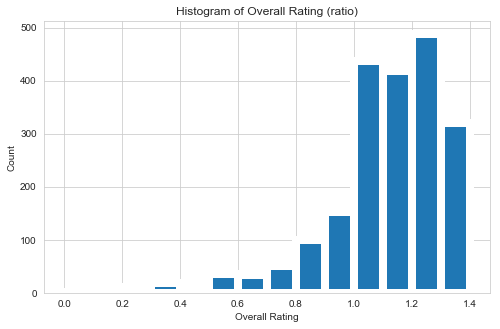

In [502]:
# Plot overall rating
plt.figure(figsize = (8, 5))
plt.xlabel('Overall Rating')
plt.ylabel('Count')
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4]
plt.hist(x = twitter_archive_master.overall_rating, 
         edgecolor='white', linewidth=8, bins = bins)
plt.title('Histogram of Overall Rating (ratio)');

### Dog Stage Pie Chart

Some definitions:
- Pupper: A small Doggo, usually younger.  They can be equally, if not more mature then some Doggos. Inexperienced, unfamiliar, or unprepared for the responsibilies associated of being a Doggo.
- Puppo: A transitional phase between Pupper and Doggo, the dog equivalent of a teenager.
- Doggo: A big Puppo, usually older. They  probably understand taxes and whatnot.
- Floofer: Any dog really, but the classification is usually given to dogs with seemingly excess fur.



From the WeRateDog tweets, it looks like Puppers dominate the 4 categories with 66%, followed by Doggo, Puppo, Floofer, and Pupper + Doggo (tweet that have 2 dogs).  Keep in mind that not all tweets have a classification on the dog's stage as this is only showing the tweets that do have one.

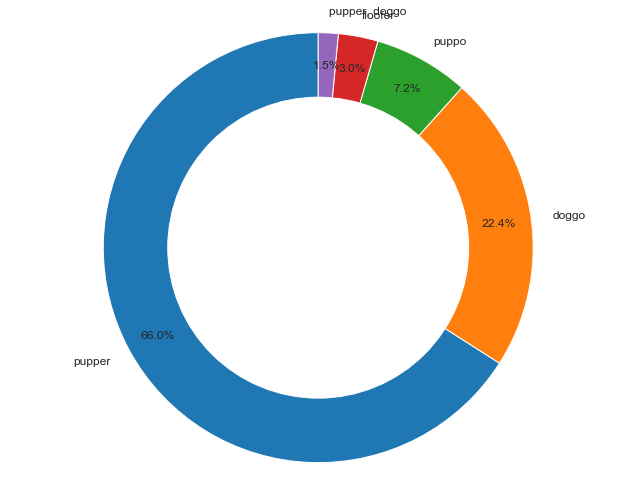

In [503]:
# Plot the data partitioned by dog stages

stage_count = twitter_archive_master.stage.value_counts().tolist()
stages = twitter_archive_master.stage.value_counts().index.tolist()
fig1, ax1 = plt.subplots(figsize=(9, 7))

ax1.pie(stage_count, labels = stages, autopct='%1.1f%%', shadow = False, startangle = 90,pctdistance=0.85,
       textprops={'fontsize': 12})
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show;

### Gender Pie Chart

Here's the dog's gender breakdown from the tweets.  Male dogs account for about 75% and female at 25%.  The gender is determined by matching the tweet's text to certain keywords.  Not all tweets will result in a gender determination.

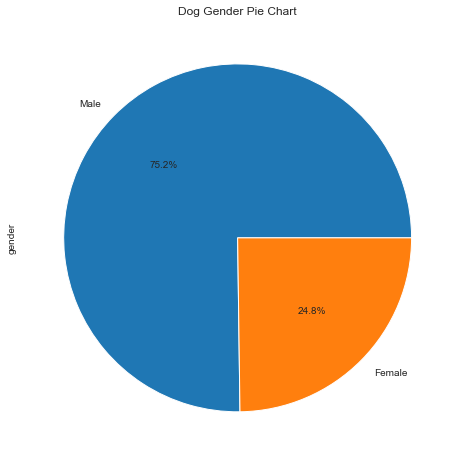

In [504]:
plt.figure(figsize = (12, 8))
twitter_archive_master.gender.value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Pie Chart');

### Distribution of Favorites and Retweet Counts

Here's a look at the histogram of the favorite and retweet counts

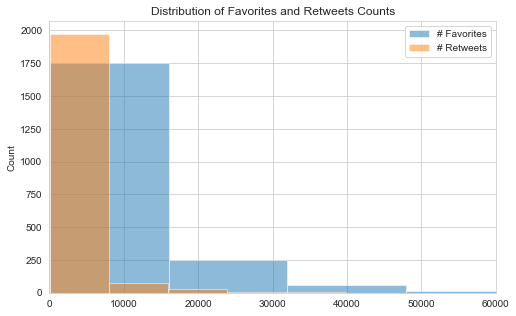

In [505]:
# Histograms of favorites and retweets
plt.figure(figsize=(8, 5))
plt.xlim(0, 60000)
plt.ylabel('Count')
plt.hist(twitter_archive_master.favorites, alpha=.5, label='# Favorites')
plt.hist(twitter_archive_master.retweets, alpha=.5, label='# Retweets')
plt.title('Distribution of Favorites and Retweets Counts')
plt.legend();

### Favorites vs Retweets Scatter Plot

Below are 2 scatterplots of favorite count vs retweet count.  From the plot we can see that these 2 variables have a pretty good correlation, as one might expect.  The first scatterplot shows all the data points, and I've placed a limits on the x-axis at 4000 and y-axis at 8000 on the second chart to show the points towards the left of the chart in a more magnified view.

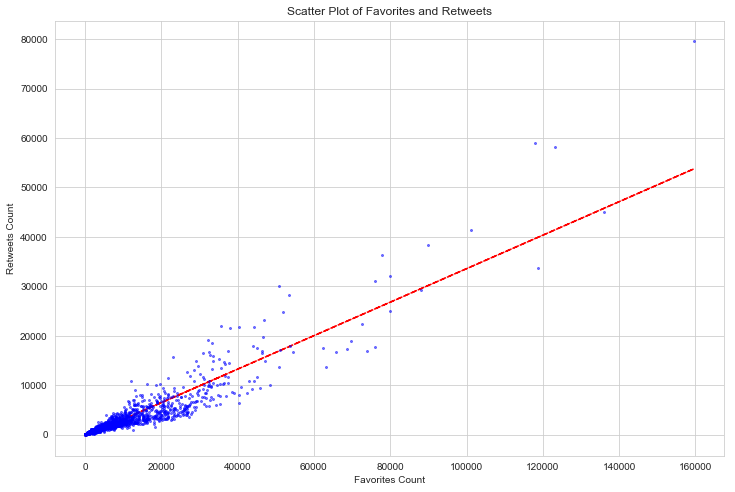

In [506]:
# Scatter plot of favorites and retweets.
plt.figure(figsize=(12, 8))
plt.xlabel('Favorites Count')
plt.ylabel('Retweets Count')

x=twitter_archive_master.favorites
y=twitter_archive_master.retweets

# add trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.plot(x, y, linestyle='', alpha=0.5, marker='o', markersize=2, color='blue')
plt.title('Scatter Plot of Favorites and Retweets');

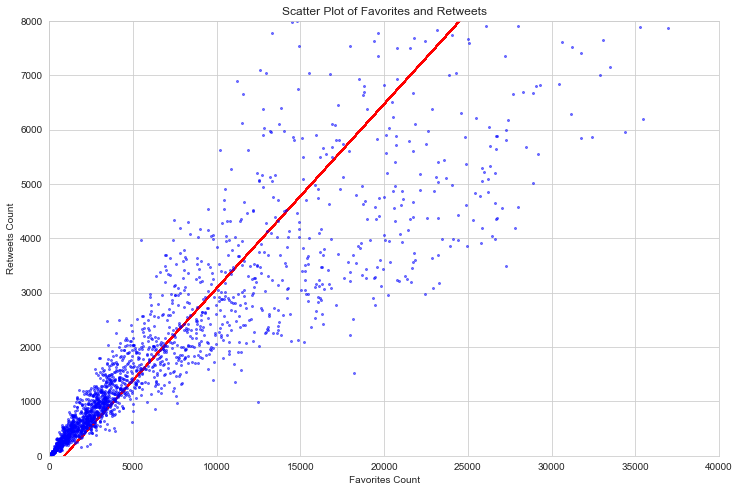

In [507]:
# Scatter plot of favorites and retweets.
plt.figure(figsize=(12, 8))
plt.xlim(0, 40000)
plt.ylim(0, 8000)
plt.xlabel('Favorites Count')
plt.ylabel('Retweets Count')

x = twitter_archive_master.favorites
y = twitter_archive_master.retweets

# add trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.plot(x, y, linestyle='', alpha=0.5, marker='o', markersize=2, color='blue')
plt.title('Scatter Plot of Favorites and Retweets');

### Most Popular Day of Week to Post

Interestingly, Monday has the highest count of the day of the week when a tweet is originated based on its timestamp.  Maybe people are most stressed on Mondays?

In [508]:
# Apply weekday function to timestamp column to get weekday output numbered to 0 to 6
twitter_archive_master['day_of_week'] = twitter_archive_master['timestamp'].apply(
    lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday())

In [509]:
# Convert 0 to 6 values to calendar days
twitter_archive_master['day_of_week'] = twitter_archive_master['day_of_week'].apply(lambda x: calendar.day_name[x])

In [510]:
twitter_archive_master.day_of_week.value_counts()

Monday       352
Tuesday      312
Wednesday    308
Thursday     292
Friday       290
Sunday       268
Saturday     268
Name: day_of_week, dtype: int64

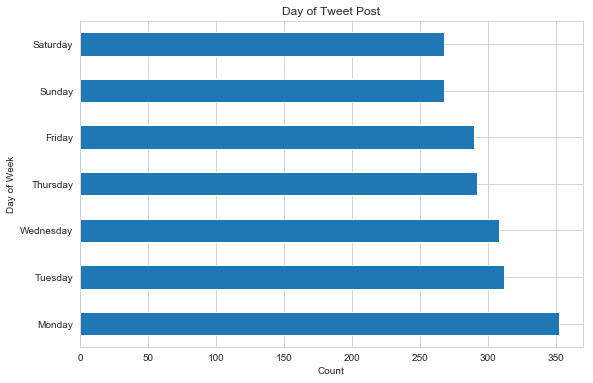

In [511]:
plt.figure(figsize = (9, 6))
twitter_archive_master.day_of_week.value_counts().plot(kind = 'barh')
plt.title('Day of Tweet Post')
plt.xlabel('Count')
plt.ylabel('Day of Week');

### Boxplot of Overall Rating Grouped by Stage

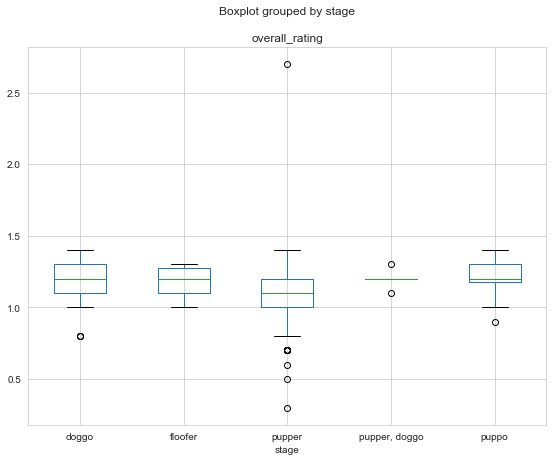

In [512]:
twitter_archive_master.boxplot(column='overall_rating', by='stage', figsize=(9, 7));

### Tweet Count by Year and Month

I used the timestamp and grouped them by year and month to determine the number tweets that originated by time period.  As we can see, the number of tweets have certainly declined since the peak at January 2016 of over 350 tweets a month and is down to aboiut 50 tweets a month by July 2017.

In [513]:
# Make sure timestamp works for the groupby function by date.
twitter_archive_master.timestamp = pd.to_datetime(
    twitter_archive_master['timestamp'], format='%Y-%m-%d %H:%M:%S')
cg_month_tweets = twitter_archive_master.groupby(
    pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
cg_month_tweets = cg_month_tweets[['timestamp', 'tweet_id']]
cg_month_tweets.head()

,timestamp,tweet_id
0,2015-11-30,296
1,2015-12-31,371
2,2016-01-31,183
3,2016-02-29,121
4,2016-03-31,132


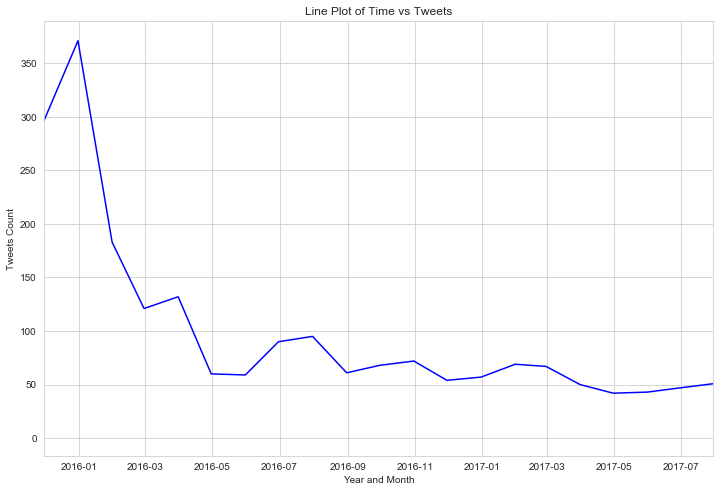

In [514]:
# Line plot of Time vs Tweets.
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 
plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')
plt.plot(cg_month_tweets.timestamp, cg_month_tweets.tweet_id, color='blue')
plt.title('Line Plot of Time vs Tweets');

In [515]:
twitter_archive_master.predicted_breed.value_counts().head(20)

Golden Retriever            137
Labrador Retriever           92
Pembroke                     88
Chihuahua                    78
Pug                          54
Chow                         41
Samoyed                      39
Pomeranian                   38
Toy Poodle                   36
Malamute                     29
Cocker Spaniel               27
French Bulldog               25
Chesapeake Bay Retriever     23
Seat Belt                    21
Miniature Pinscher           21
German Shepherd              20
Siberian Husky               20
Maltese Dog                  18
Shetland Sheepdog            18
Eskimo Dog                   18
Name: predicted_breed, dtype: int64

### Top 20 Dog Breeds based on tweeted picture

Not suprisingly, Golden Retreivers is most tweeted dog breed in WeRateDogs.

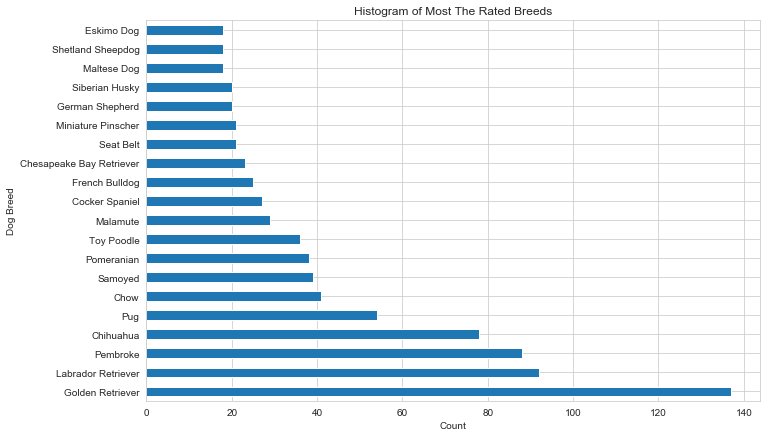

In [516]:
plt.figure(figsize = (11, 7))
twitter_archive_master.predicted_breed.value_counts().head(20).plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Dog Breed');

### Top 20 Dog Breeds based on favorite count

Now I calculate the top 20 dog breeds based on the amount of favorites that the tweet generates.  Looks like the Golden Retriever comes out on top again, followed by the beloved Labrador Retriever.  These are two of the most popular dogs in the US.

In [517]:
favorite_breed = twitter_archive_master[twitter_archive_master['dog_breed_predicted'] == True]
favorite_breed = favorite_breed.groupby('predicted_breed').sum().reset_index()                                                         
favorite_breed = favorite_breed[['predicted_breed', 'favorites']].sort_values('favorites', ascending = False)[0:20]

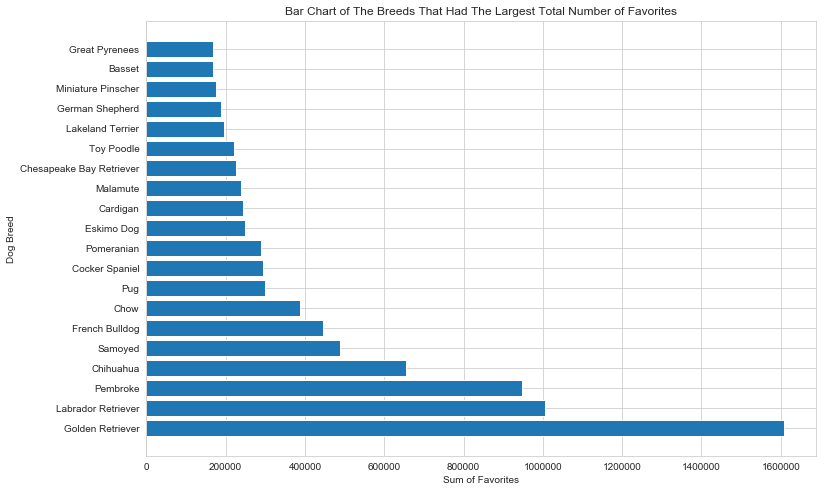

In [518]:
# Bar graph of most 'favorites' breed.
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.barh(range(len(favorite_breed.predicted_breed)), favorite_breed.favorites) 
plt.yticks(range(len(favorite_breed.predicted_breed)),favorite_breed.predicted_breed)
plt.xlabel('Sum of Favorites')
plt.ylabel('Dog Breed')
plt.title('Bar Chart of The Breeds That Had The Largest Total Number of Favorites');